# Bayesian Image Restoration Experiments

In [1]:
from restoration import *

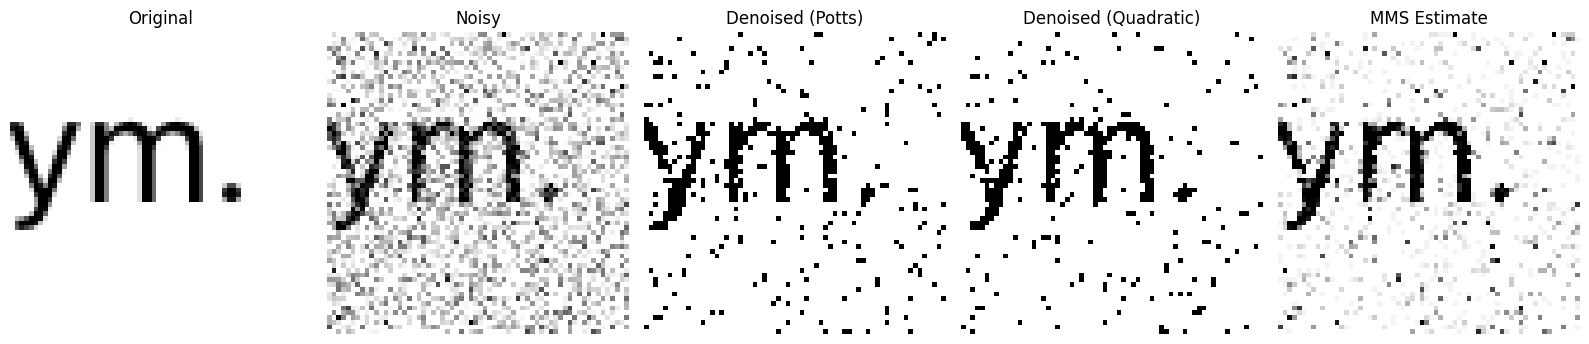

In [2]:
path = 'image.png'  # change this to your image path
original = load_grayscale_image(path)
cropped = original[:64, :64]  # work on a small patch for speed
noisy = add_noise(cropped, sigma=0.3)

denoised_potts, potts_samples = simulated_annealing_with_samples(noisy, n_iter=40, sigma=0.3, beta_init=1.0, cooling=0.97)
denoised_quad = simulated_annealing_quadratic(noisy, n_iter=40, sigma=0.3, lam=2.0, alpha=1.0, cooling=0.97)

map_result = map_estimate(denoised_potts)
mms_result = mms_estimate(potts_samples)

plt.figure(figsize=(16, 5))
plt.subplot(1, 5, 1)
plt.title("Original")
plt.imshow(cropped, cmap='gray')
plt.axis('off')

plt.subplot(1, 5, 2)
plt.title("Noisy")
plt.imshow(noisy, cmap='gray')
plt.axis('off')

plt.subplot(1, 5, 3)
plt.title("Denoised (Potts)")
plt.imshow(denoised_potts, cmap='gray')
plt.axis('off')

plt.subplot(1, 5, 4)
plt.title("Denoised (Quadratic)")
plt.imshow(denoised_quad, cmap='gray')
plt.axis('off')

plt.subplot(1, 5, 5)
plt.title("MMS Estimate")
plt.imshow(mms_result, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()
